In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [5]:
Airline_path = "datanew/Airlines.csv"

Airline = pd.read_csv(Airline_path, header=0,  index_col=0)
Airline

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
id,,,,,,,,
1,CO,269,SFO,IAH,3,15,205,1
2,US,1558,PHX,CLT,3,15,222,1
3,AA,2400,LAX,DFW,3,20,165,1
4,AA,2466,SFO,DFW,3,20,195,1
5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...
539379,CO,178,OGG,SNA,5,1439,326,0
539380,FL,398,SEA,ATL,5,1439,305,0
539381,FL,609,SFO,MKE,5,1439,255,0


In [6]:
Airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539383 entries, 1 to 539383
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Airline      539383 non-null  object
 1   Flight       539383 non-null  int64 
 2   AirportFrom  539383 non-null  object
 3   AirportTo    539383 non-null  object
 4   DayOfWeek    539383 non-null  int64 
 5   Time         539383 non-null  int64 
 6   Length       539383 non-null  int64 
 7   Delay        539383 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 37.0+ MB


In [7]:
Airline.isna().sum()

Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [8]:
Airline.describe()

,Flight,DayOfWeek,Time,Length,Delay
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,2427.928630,3.929668,802.728963,132.202007,0.445442
std,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.000000,1.000000,10.000000,0.000000,0.000000
25%,712.000000,2.000000,565.000000,81.000000,0.000000
50%,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [9]:
Airline.columns

Index(['Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time',
       'Length', 'Delay'],
      dtype='object')

In [7]:
# Data Preprocessing

In [7]:
X_cat = Airline[['Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek']]
X_num = Airline.drop(['Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Delay'], axis=1)

In [8]:
X_cat = pd.get_dummies(X_cat, drop_first=True)

In [9]:
X_cat

,DayOfWeek,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,Airline_EV,Airline_F9,Airline_FL,Airline_HA,...,AirportTo_TXK,AirportTo_TYR,AirportTo_TYS,AirportTo_UTM,AirportTo_VLD,AirportTo_VPS,AirportTo_WRG,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM
id,,,,,,,,,,,,,,,,,,,,,
1,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539379,5,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539380,5,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
539381,5,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)
X = pd.concat([X_scaled, X_cat], axis=1)
y = Airline['Delay']

In [12]:
X.head()

,Flight,Time,Length,DayOfWeek,Airline_AA,Airline_AS,Airline_B6,Airline_CO,Airline_DL,Airline_EV,...,AirportTo_TXK,AirportTo_TYR,AirportTo_TYS,AirportTo_UTM,AirportTo_VLD,AirportTo_VPS,AirportTo_WRG,AirportTo_XNA,AirportTo_YAK,AirportTo_YUM
id,,,,,,,,,,,,,,,,,,,,,
1,-1.044258,-2.833092,1.038237,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.420778,-2.833092,1.280689,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.013509,-2.815110,0.467761,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.018415,-2.815110,0.895618,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,-1.122133,-2.779144,0.995451,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X.isna().sum()

Flight           0
Time             0
Length           0
DayOfWeek        0
Airline_AA       0
                ..
AirportTo_VPS    0
AirportTo_WRG    0
AirportTo_XNA    0
AirportTo_YAK    0
AirportTo_YUM    0
Length: 605, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
classifier = LogisticRegression()
classifier

LogisticRegression()

In [18]:
classifier.fit(X_train, y_train)

C:\Users\Connor\anaconda3\envs\PythonData38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.6444503222202171
Testing Data Score: 0.6444462572119306


In [20]:
n_cpu=os.cpu_count()
print("The number of cpus: ",n_cpu)
n_thread=n_cpu*2
print("Expected number of threads:",n_thread)

The number of cpus:  12
Expected number of threads: 24


In [28]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier

In [29]:
# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
randomForestClass = RandomForestClassifier(random_state=42)
randomForestClass.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
 print("RandomForestClassifier score: ", randomForestClass.score(X_test,y_test))

RandomForestClassifier score:  0.6184099125544603


In [32]:
# Create a RandomForestClassifier model, fit it to the data, and print the model's score.
randomForestClass_scaled = RandomForestClassifier(random_state=0)
randomForestClass_scaled.fit(X_train_scaled, y_train)
print("RandomForestClassifier scaled score: ", randomForestClass_scaled.score(X_test_scaled, y_test))

RandomForestClassifier scaled score:  0.6186756481166764


In [34]:
# Size for images
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (17,10)
mpl.rcParams['font.size'] = 20

<AxesSubplot:>

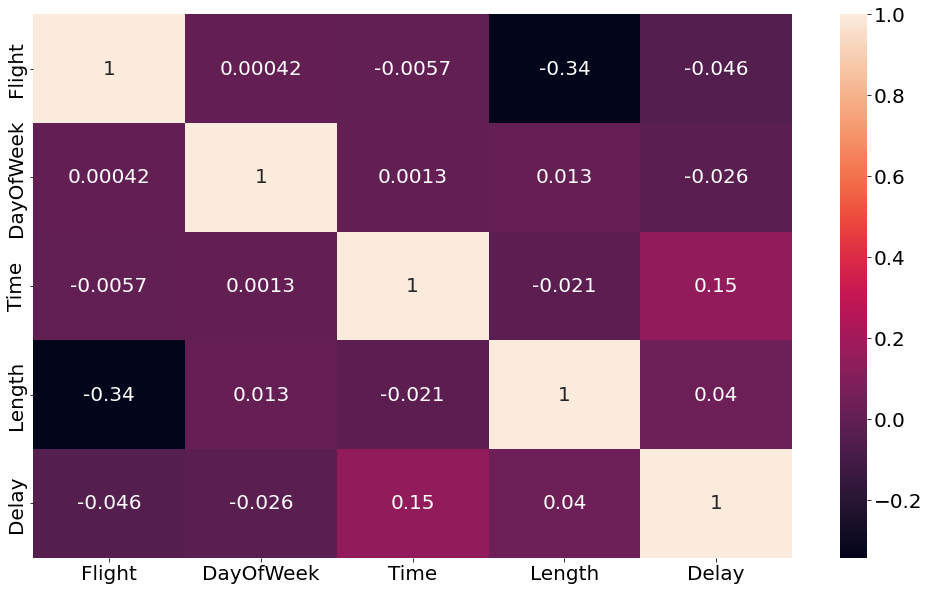

In [35]:
sns.heatmap(Airline.corr(), annot=True)

<AxesSubplot:xlabel='Flight', ylabel='Count'>

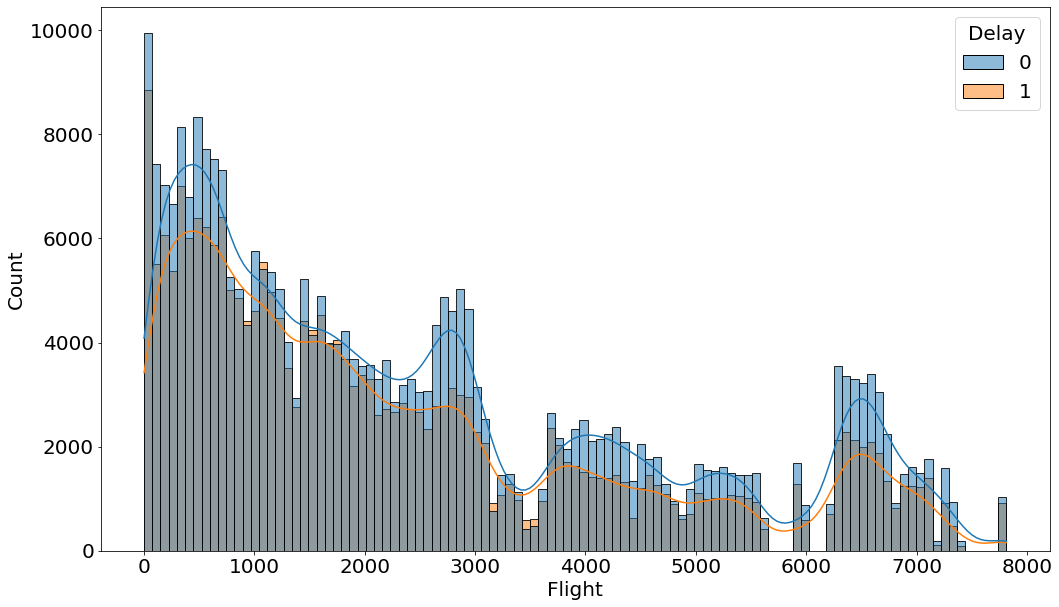

In [36]:
sns.histplot(data=Airline, x='Airline', hue='Delay', kde=True)

<AxesSubplot:xlabel='Time', ylabel='Count'>

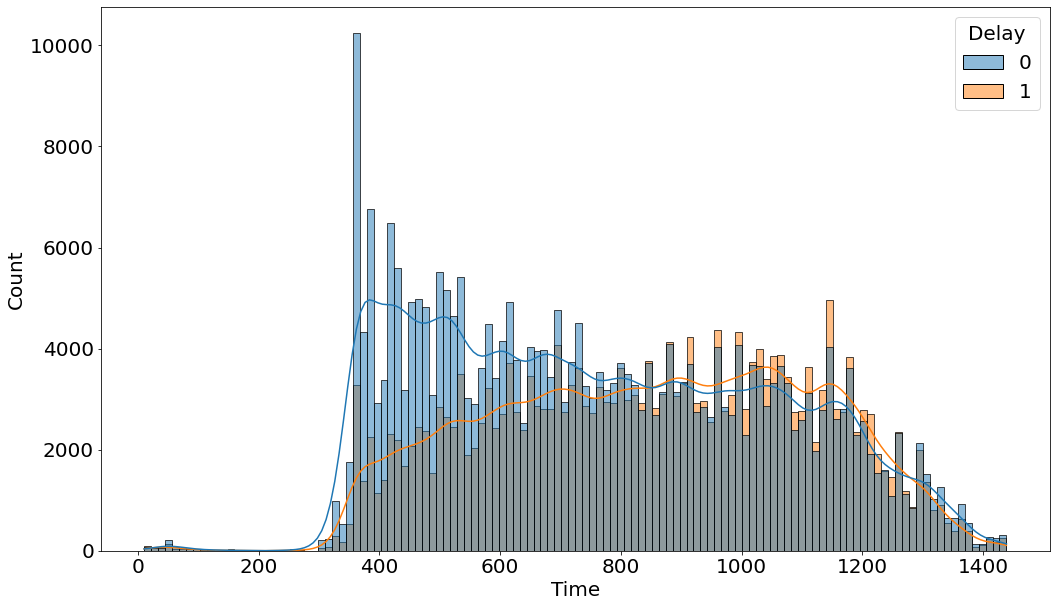

In [37]:
sns.histplot(data=Airline, x='Time', hue='Delay', kde=True)

<AxesSubplot:xlabel='Length', ylabel='Count'>

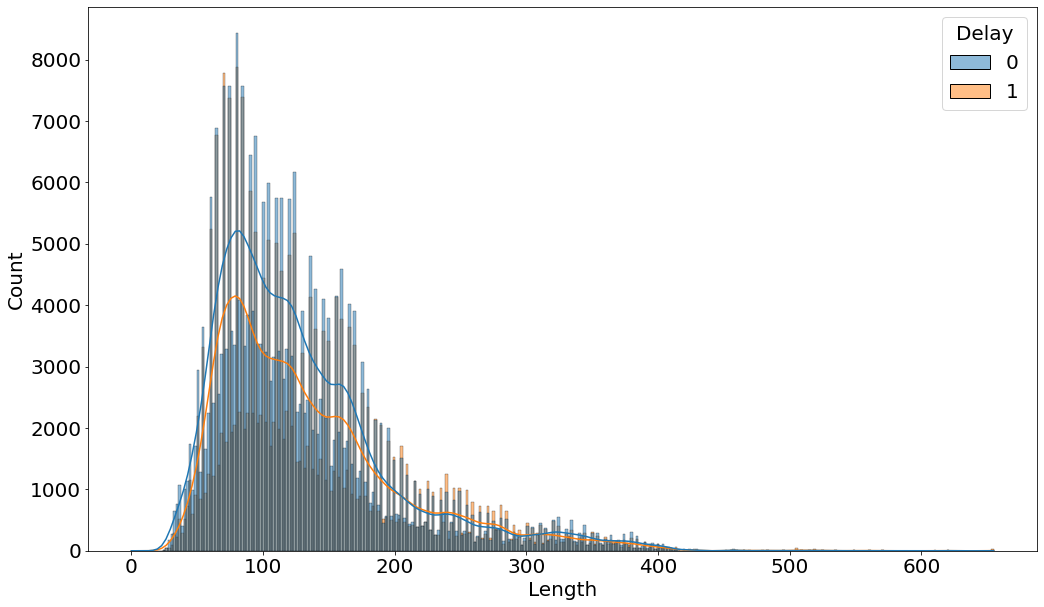

In [39]:
sns.histplot(data=Airline, x='Length', hue='Delay', kde=True)

In [40]:
lt = Airline['Length'].quantile(0.99)
print(lt)

368.0


In [41]:
Airline.columns

Index(['Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Time',
       'Length', 'Delay'],
      dtype='object')

<AxesSubplot:xlabel='Airline', ylabel='count'>

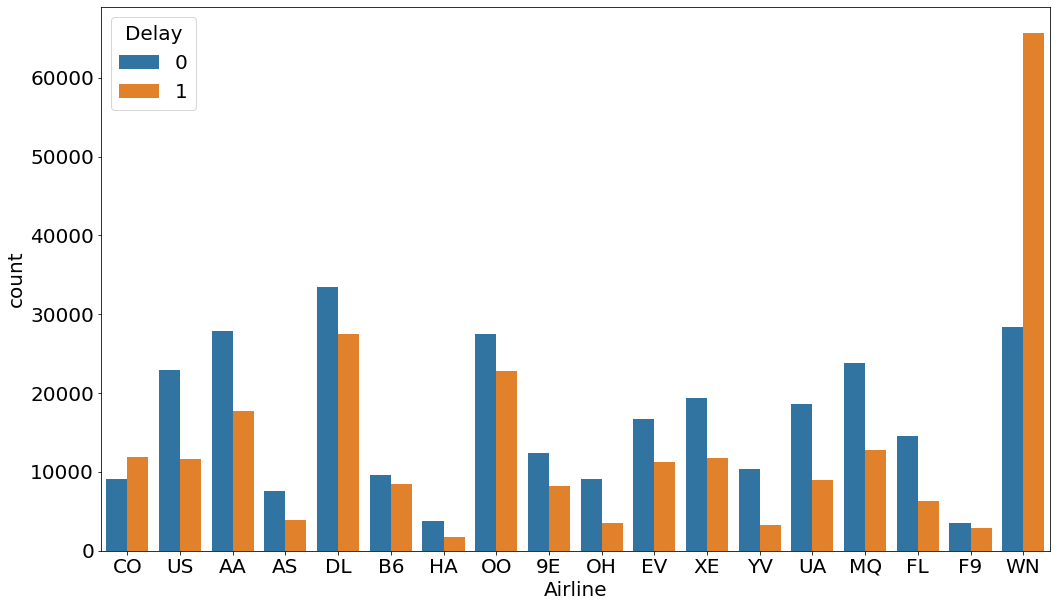

In [42]:
sns.countplot(data=Airline, x='Airline', hue='Delay')

<AxesSubplot:xlabel='AirportFrom', ylabel='count'>

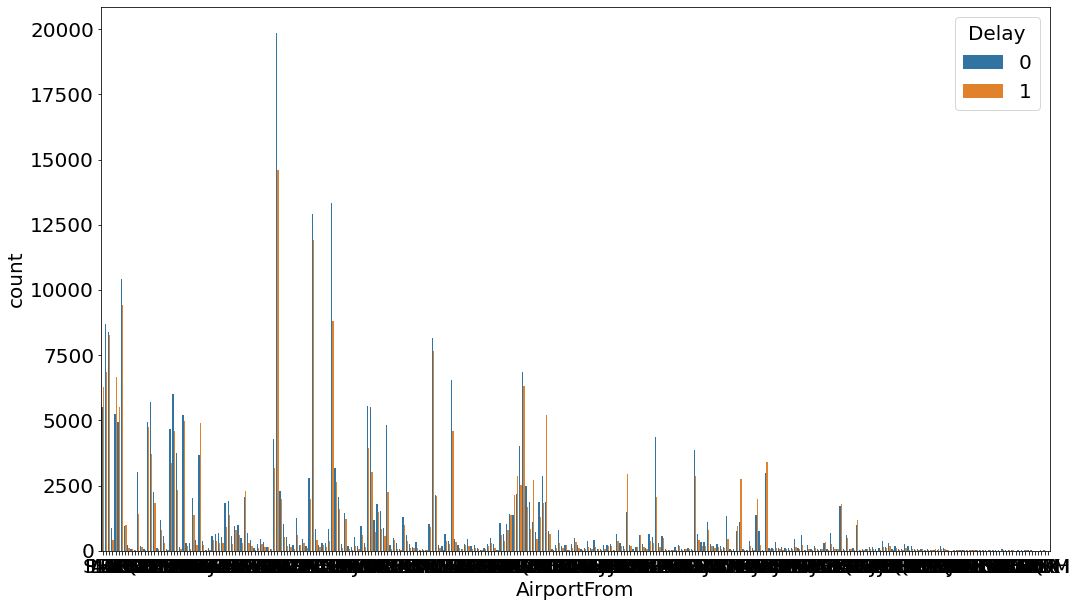

In [43]:
sns.countplot(data=Airline, x='AirportFrom', hue='Delay')

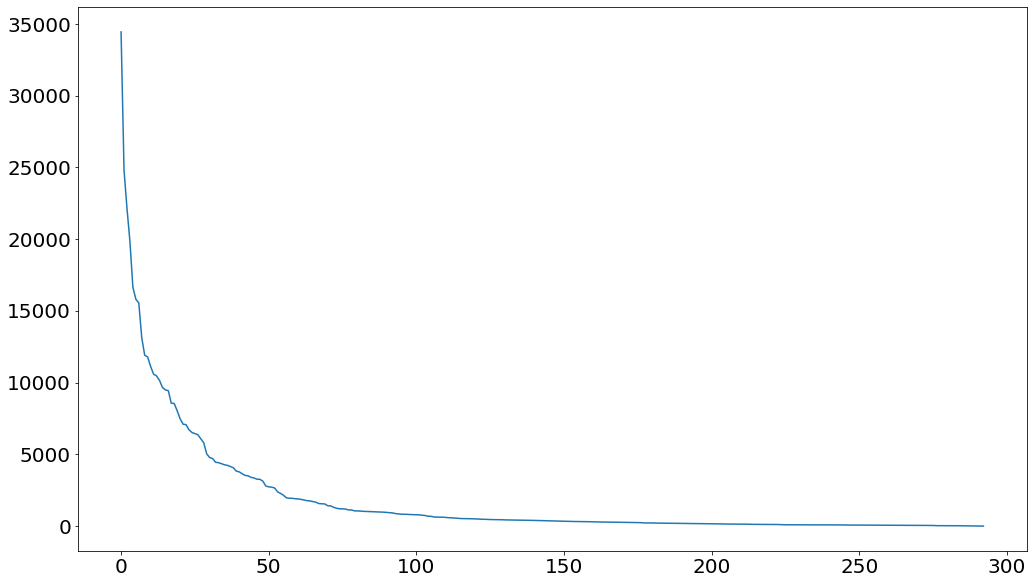

In [44]:
airfrom = Airline['AirportFrom'].value_counts()
plt.plot(range(len(airfrom)), airfrom)

In [45]:
Airline['AirportFrom'] = Airline['AirportFrom'].apply(lambda s: s if str(s) in airfrom[:50] else 'others')

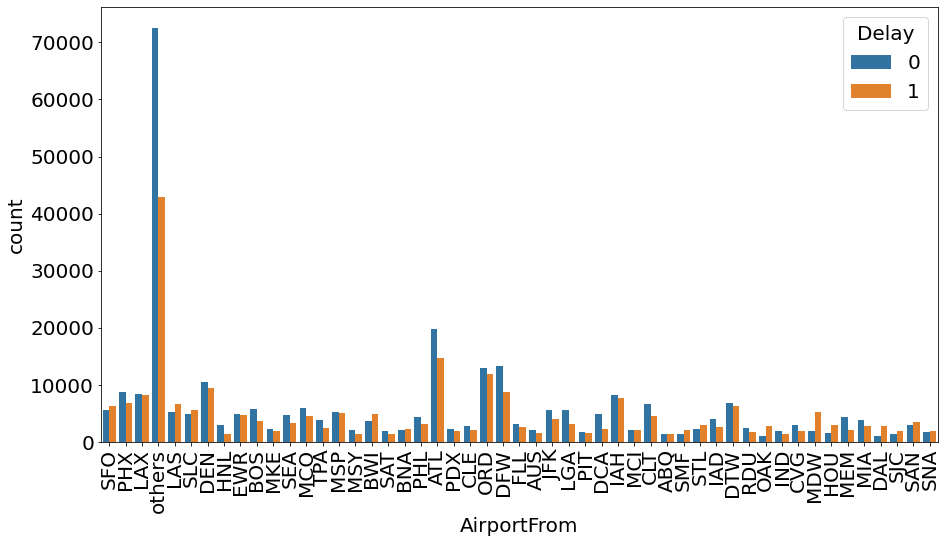

In [46]:
fig = plt.figure(figsize=(15, 8))
sns.countplot(data=Airline, x='AirportFrom', hue='Delay')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='AirportTo', ylabel='count'>

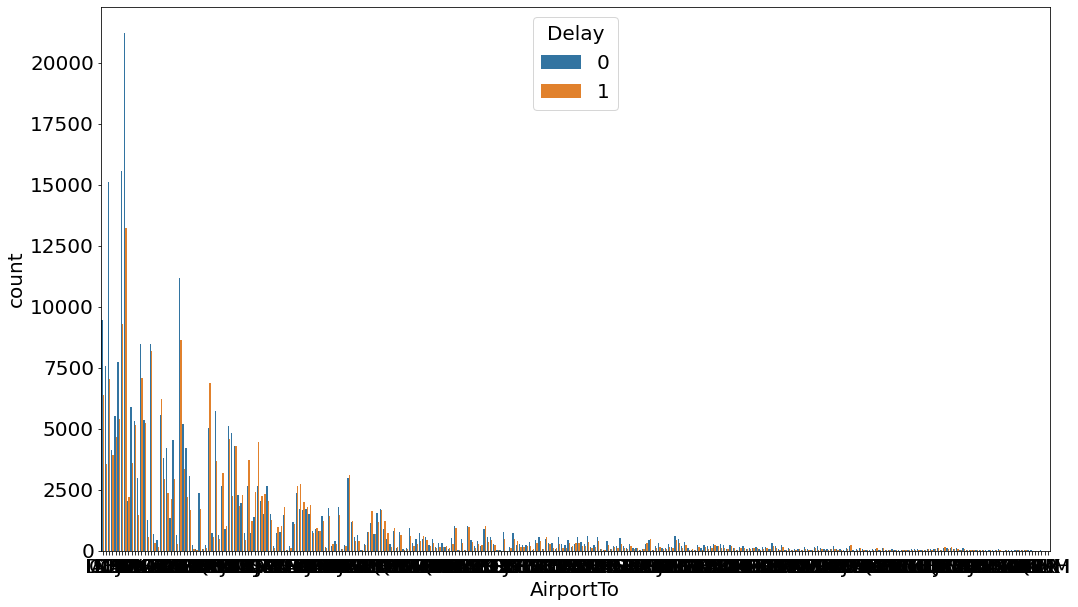

In [47]:
sns.countplot(data=Airline, x='AirportTo', hue='Delay')

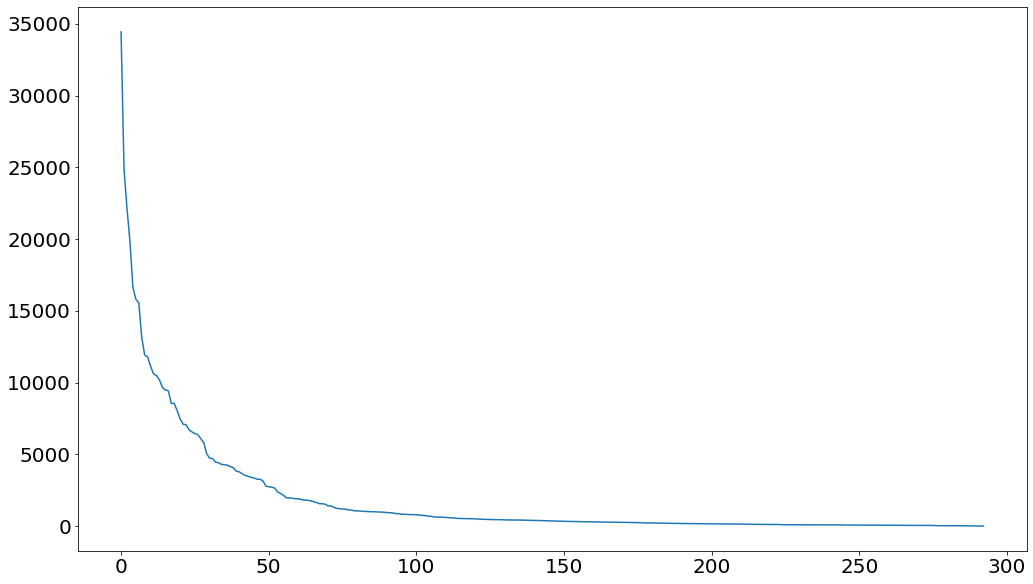

In [48]:
airto = Airline['AirportTo'].value_counts()
plt.plot(range(len(airto)), airto)

In [49]:
Airline['AirportTo'] = Airline['AirportTo'].apply(lambda s: s if str(s) in airto[:50] else 'others')

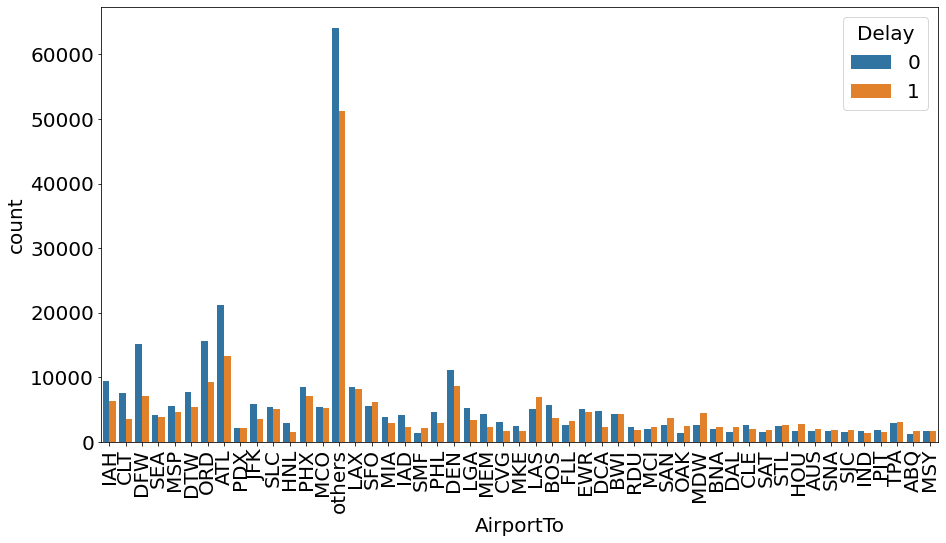

In [50]:
fig = plt.figure(figsize=(15, 8))
sns.countplot(data=Airline, x='AirportTo', hue='Delay')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='DayOfWeek', ylabel='count'>

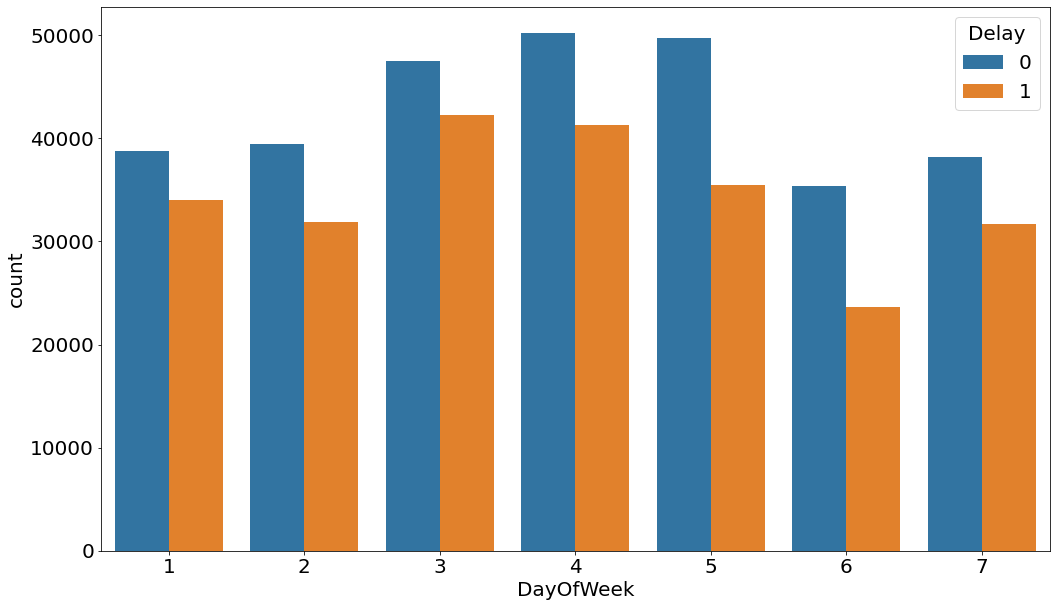

In [51]:
sns.countplot(data=Airline, x='DayOfWeek', hue='Delay')